## Test Notebook

### First notebook for faliliarisation with keras/pandas/rdkit etc

In [229]:
from rdkit import Chem
import pandas as pd
import numpy as np
from pyteomics import mgf

# read in mgf file
mgf_data = mgf.read("../data/raw/gnps_with_inchi_structure.mgf")
# create dataframe with name, inchikey and SMILES strings
data = pd.DataFrame({'Name': mol['params']['name'], 'inchikey': mol['params']['inchikey'], 'SMILES': mol['params']['smiles']} for mol in mgf_data)
data.head()

,Name,SMILES,inchikey
0,Duguetine N-oxide M+H,O[C@H]1C2=C(C=C(OC)C(OC)=C2)C3=C([C@]1([H])[N+...,XKKFNYKNDDHAQC-CHEUHSMRSA-N
1,val-leu-pro-val-pro M+H,N1(C(=O)[C@@H](NC(=O)[C@H]2N(C(=O)[C@@H](NC(=O...,KSIHMACFIAFKIG-FSFMBLRGSA-N
2,tBuO-val-hexanoate (tert-butyl hexanoylvalinat...,CCCCCC(NC(C(C)C)C(OC(C)(C)C)=O)=O,NVXHLYRVFXNJGK-UHFFFAOYSA-N
3,tBuO-val-hexanoate (tert-butyl hexanoylvalinat...,CCCCCC(NC(C(C)C)C(OC(C)(C)C)=O)=O,NVXHLYRVFXNJGK-UHFFFAOYSA-N
4,Kalkipyrone B M+H-H2O,C[C@@H](O)/C=C(C)/CCC/C(C)=C/CC(OC(OC)=C1C)=C(...,POWDQNOFNJBGFS-FEFCGZSXSA-N


In [230]:
""" Check each entry for valid inchikey and SMILES string
"""

for i, row in data.iterrows():
    #rint("row %d" % i)
    smile = row['SMILES']
    inchikey = row['inchikey']
    
    
    if len(smile) > 0 and smile != "N/A":
        if Chem.MolStandardize.rdMolStandardize.ValidateSmiles("O[C@H]1C2=C(C=C(OC)C(OC)=C2)C3=C([C@]1([H])[N+](C)([O-])CC4)C4=CC5=C3OCO5") == []:
            pass
        else:
            print("ERROR: INVALID SMILE")
            #print(smile)
    else:
        # convert inchi to smiles
        print("ERROR: MISSING SMILES : %s" % smile)
        
    if len(inchikey) > 0:
        pass
    else:
        print("ERROR: MISSING INCHIKEY")

ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : N/A
ERROR: MISSING SMILES : N/A
ERROR: MISSING SMILES : N/A
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 


In [235]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from IPython.display import SVG
from keras.utils import model_to_dot

model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

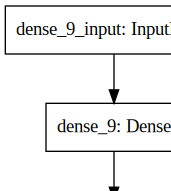

In [236]:
# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
#model.fit(x_train, y_train, epochs=5, batch_size=32)
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [111]:
print(data.iloc[0]['SMILES'])

O[C@H]1C2=C(C=C(OC)C(OC)=C2)C3=C([C@]1([H])[N+](C)([O-])CC4)C4=CC5=C3OCO5


ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : N/A
ERROR: MISSING SMILES : N/A
ERROR: MISSING SMILES : N/A
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 
ERROR: MISSING SMILES : 


In [156]:
mgf.get_spectrum("../data/raw/gnps_with_inchi_structure.mgf", title=mgf_data[0]['params']['title'])

{'params': {'title': 'Scan Number: 1',
  'pepmass': (372.17999, None),
  'charge': [1],
  'compoundname': 'Duguetine N-oxide',
  'libraryquality': '3',
  'smiles': 'O[C@H]1C2=C(C=C(OC)C(OC)=C2)C3=C([C@]1([H])[N+](C)([O-])CC4)C4=CC5=C3OCO5',
  'inchikey': 'XKKFNYKNDDHAQC-CHEUHSMRSA-N',
  'inchi': '',
  'mslevel': '2',
  'source_instrument': 'LC-ESI-qTof',
  'filename': 'f.amazonia/Library/C11.mzXML;',
  'seq': '*..*',
  'notes': '',
  'ionmode': 'Positive',
  'organism': 'GNPS-LIBRARY',
  'name': 'Duguetine N-oxide M+H',
  'spectrumid': 'CCMSLIB00005436069',
  'activation': 'CID',
  'instrument': 'ion trap',
  'scans': '1'},
 'm/z array': array([ 58.064877,  60.044109, 235.07457 , 236.083115, 237.09137 ,
        238.098541, 239.107452, 250.098541, 251.106705, 254.093857,
        262.098907, 263.106079, 264.11319 , 265.086029, 266.092621,
        267.101196, 268.107086, 269.117035, 270.12146 , 278.092712,
        279.101776, 280.105103, 281.080292, 281.117279, 282.087311,
        282.123

[]


NameError: name 'smiles_str' is not defined

True


RuntimeError: Pre-condition Violation
	no atoms
	Violation occurred on line 173 in file Code/GraphMol/ROMol.cpp
	Failed Expression: getNumAtoms() > 0
	RDKIT: 2019.03.4
	BOOST: 1_67
